In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/water-quality-and-potability/water_potability.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [2]:
df['Potability'].value_counts(normalize=True)

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

Our Potability class is a bit unbalanced.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# what fracction of our data is missing no values?
len(df.dropna())/len(df)

0.6138583638583639

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


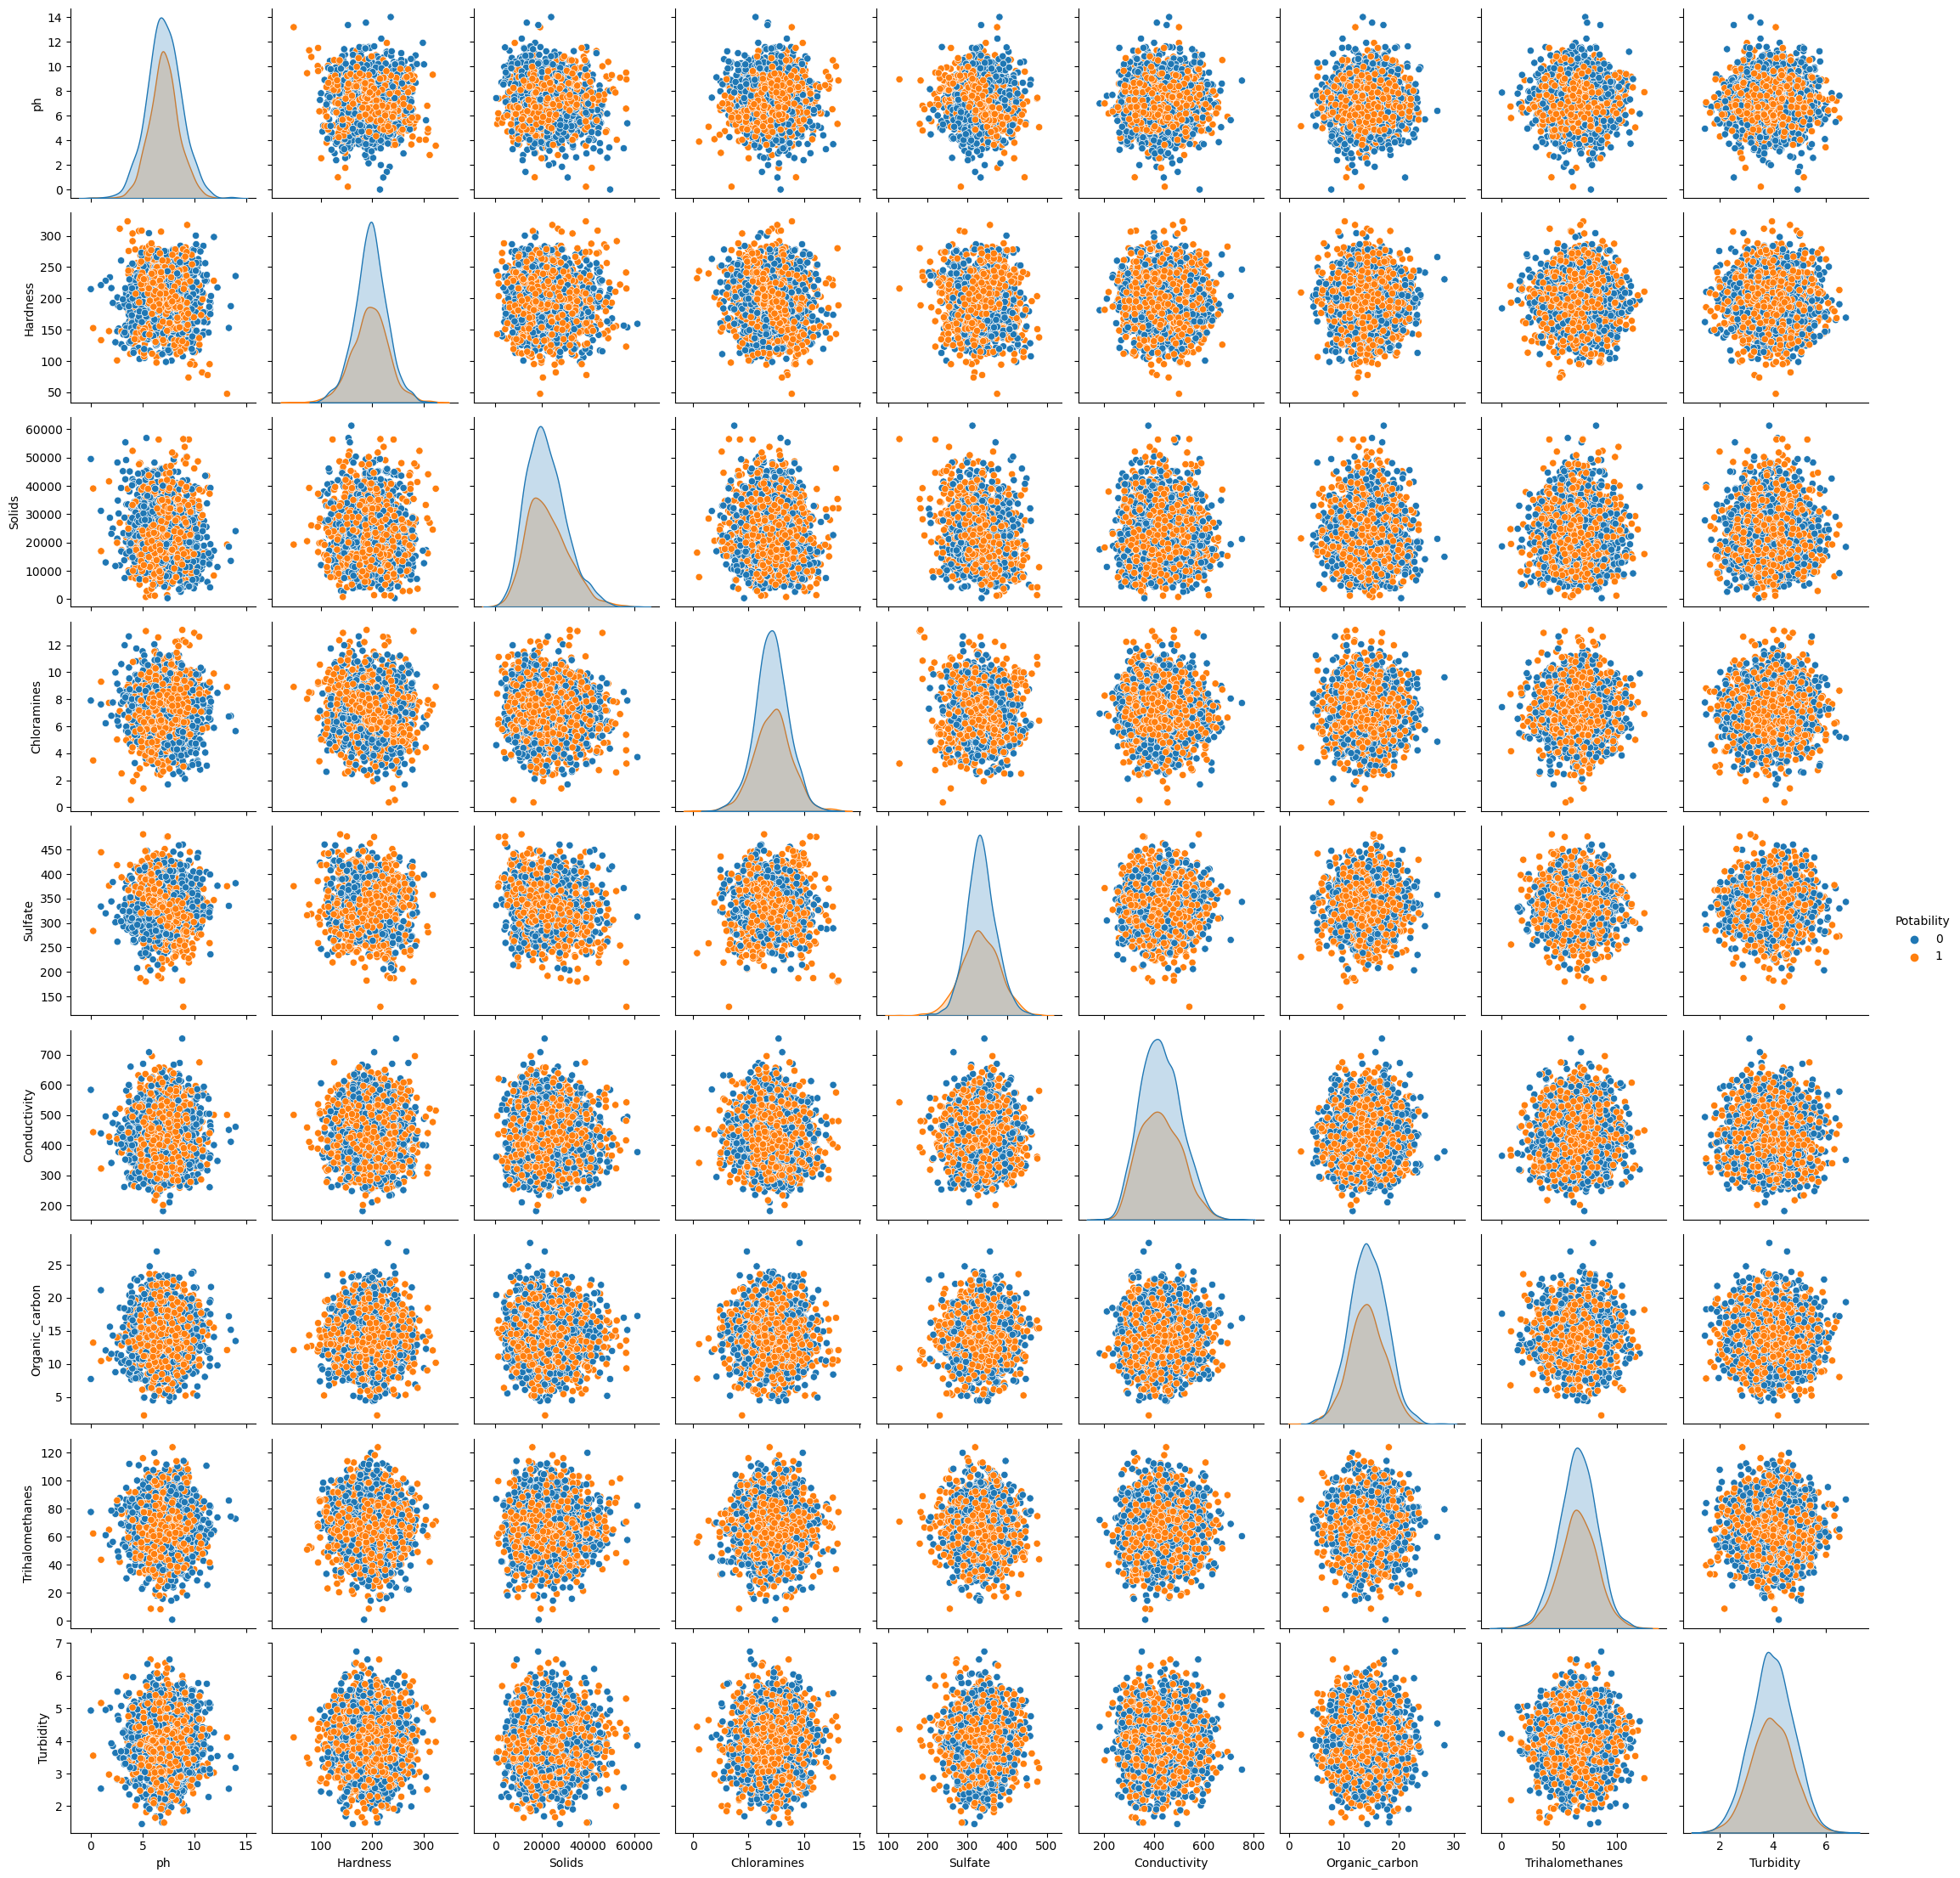

In [5]:
from seaborn import pairplot
pairplot(data=df, hue='Potability')

Wow that looks random.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Potability']), df['Potability'], test_size=0.25, random_state=2023, 
                                                    stratify=df['Potability'])
print('stratify train: {:5.2f} test: {:5.2f}'.format(y_train.sum()/len(y_train), y_test.sum()/len(y_test)))

stratify train:  0.39 test:  0.39


In [7]:
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(random_state=2023, verbose=1)
model.fit(X=X_train, y=y_train)
model.classes_

Binning 0.000 GB of training data: 0.010 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 10, in 0.009s
[2/100] 1 tree, 31 leaves, max depth = 9, in 0.007s
[3/100] 1 tree, 31 leaves, max depth = 11, in 0.007s
[4/100] 1 tree, 31 leaves, max depth = 12, in 0.007s
[5/100] 1 tree, 31 leaves, max depth = 9, in 0.007s
[6/100] 1 tree, 31 leaves, max depth = 9, in 0.007s
[7/100] 1 tree, 31 leaves, max depth = 11, in 0.007s
[8/100] 1 tree, 31 leaves, max depth = 10, in 0.007s
[9/100] 1 tree, 31 leaves, max depth = 14, in 0.007s
[10/100] 1 tree, 31 leaves, max depth = 11, in 0.007s
[11/100] 1 tree, 31 leaves, max depth = 10, in 0.007s
[12/100] 1 tree, 31 leaves, max depth = 9, in 0.007s
[13/100] 1 tree, 31 leaves, max depth = 11, in 0.007s
[14/100] 1 tree, 31 leaves, max depth = 13, in 0.007s
[15/100] 1 tree, 31 leaves, max depth = 13, in 0.007s
[16/100] 1 tree, 31 leaves, max depth = 15, in 0.006s
[17/100] 1 tree, 31 leaves, max depth = 10, in 0.006s
[18/100] 1 tree, 31

array([0, 1])

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=model.predict(X=X_test)))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       499
           1       0.65      0.44      0.52       320

    accuracy                           0.69       819
   macro avg       0.67      0.64      0.64       819
weighted avg       0.68      0.69      0.67       819



In [9]:
# by comparison what do we see if we use a trivial model?
print(classification_report(y_true=y_test, y_pred=0 * y_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       499
           1       0.00      0.00      0.00       320

    accuracy                           0.61       819
   macro avg       0.30      0.50      0.38       819
weighted avg       0.37      0.61      0.46       819



In [10]:
result_df = X_test.copy()
result_df['expected'] = y_test
result_df['observed'] = model.predict(X=X_test)
result_df['result'] = result_df['expected'].astype(str) + '/' + result_df['observed'].astype(str)
result_df['result'].value_counts()

result
0/0    422
1/0    180
1/1    140
0/1     77
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


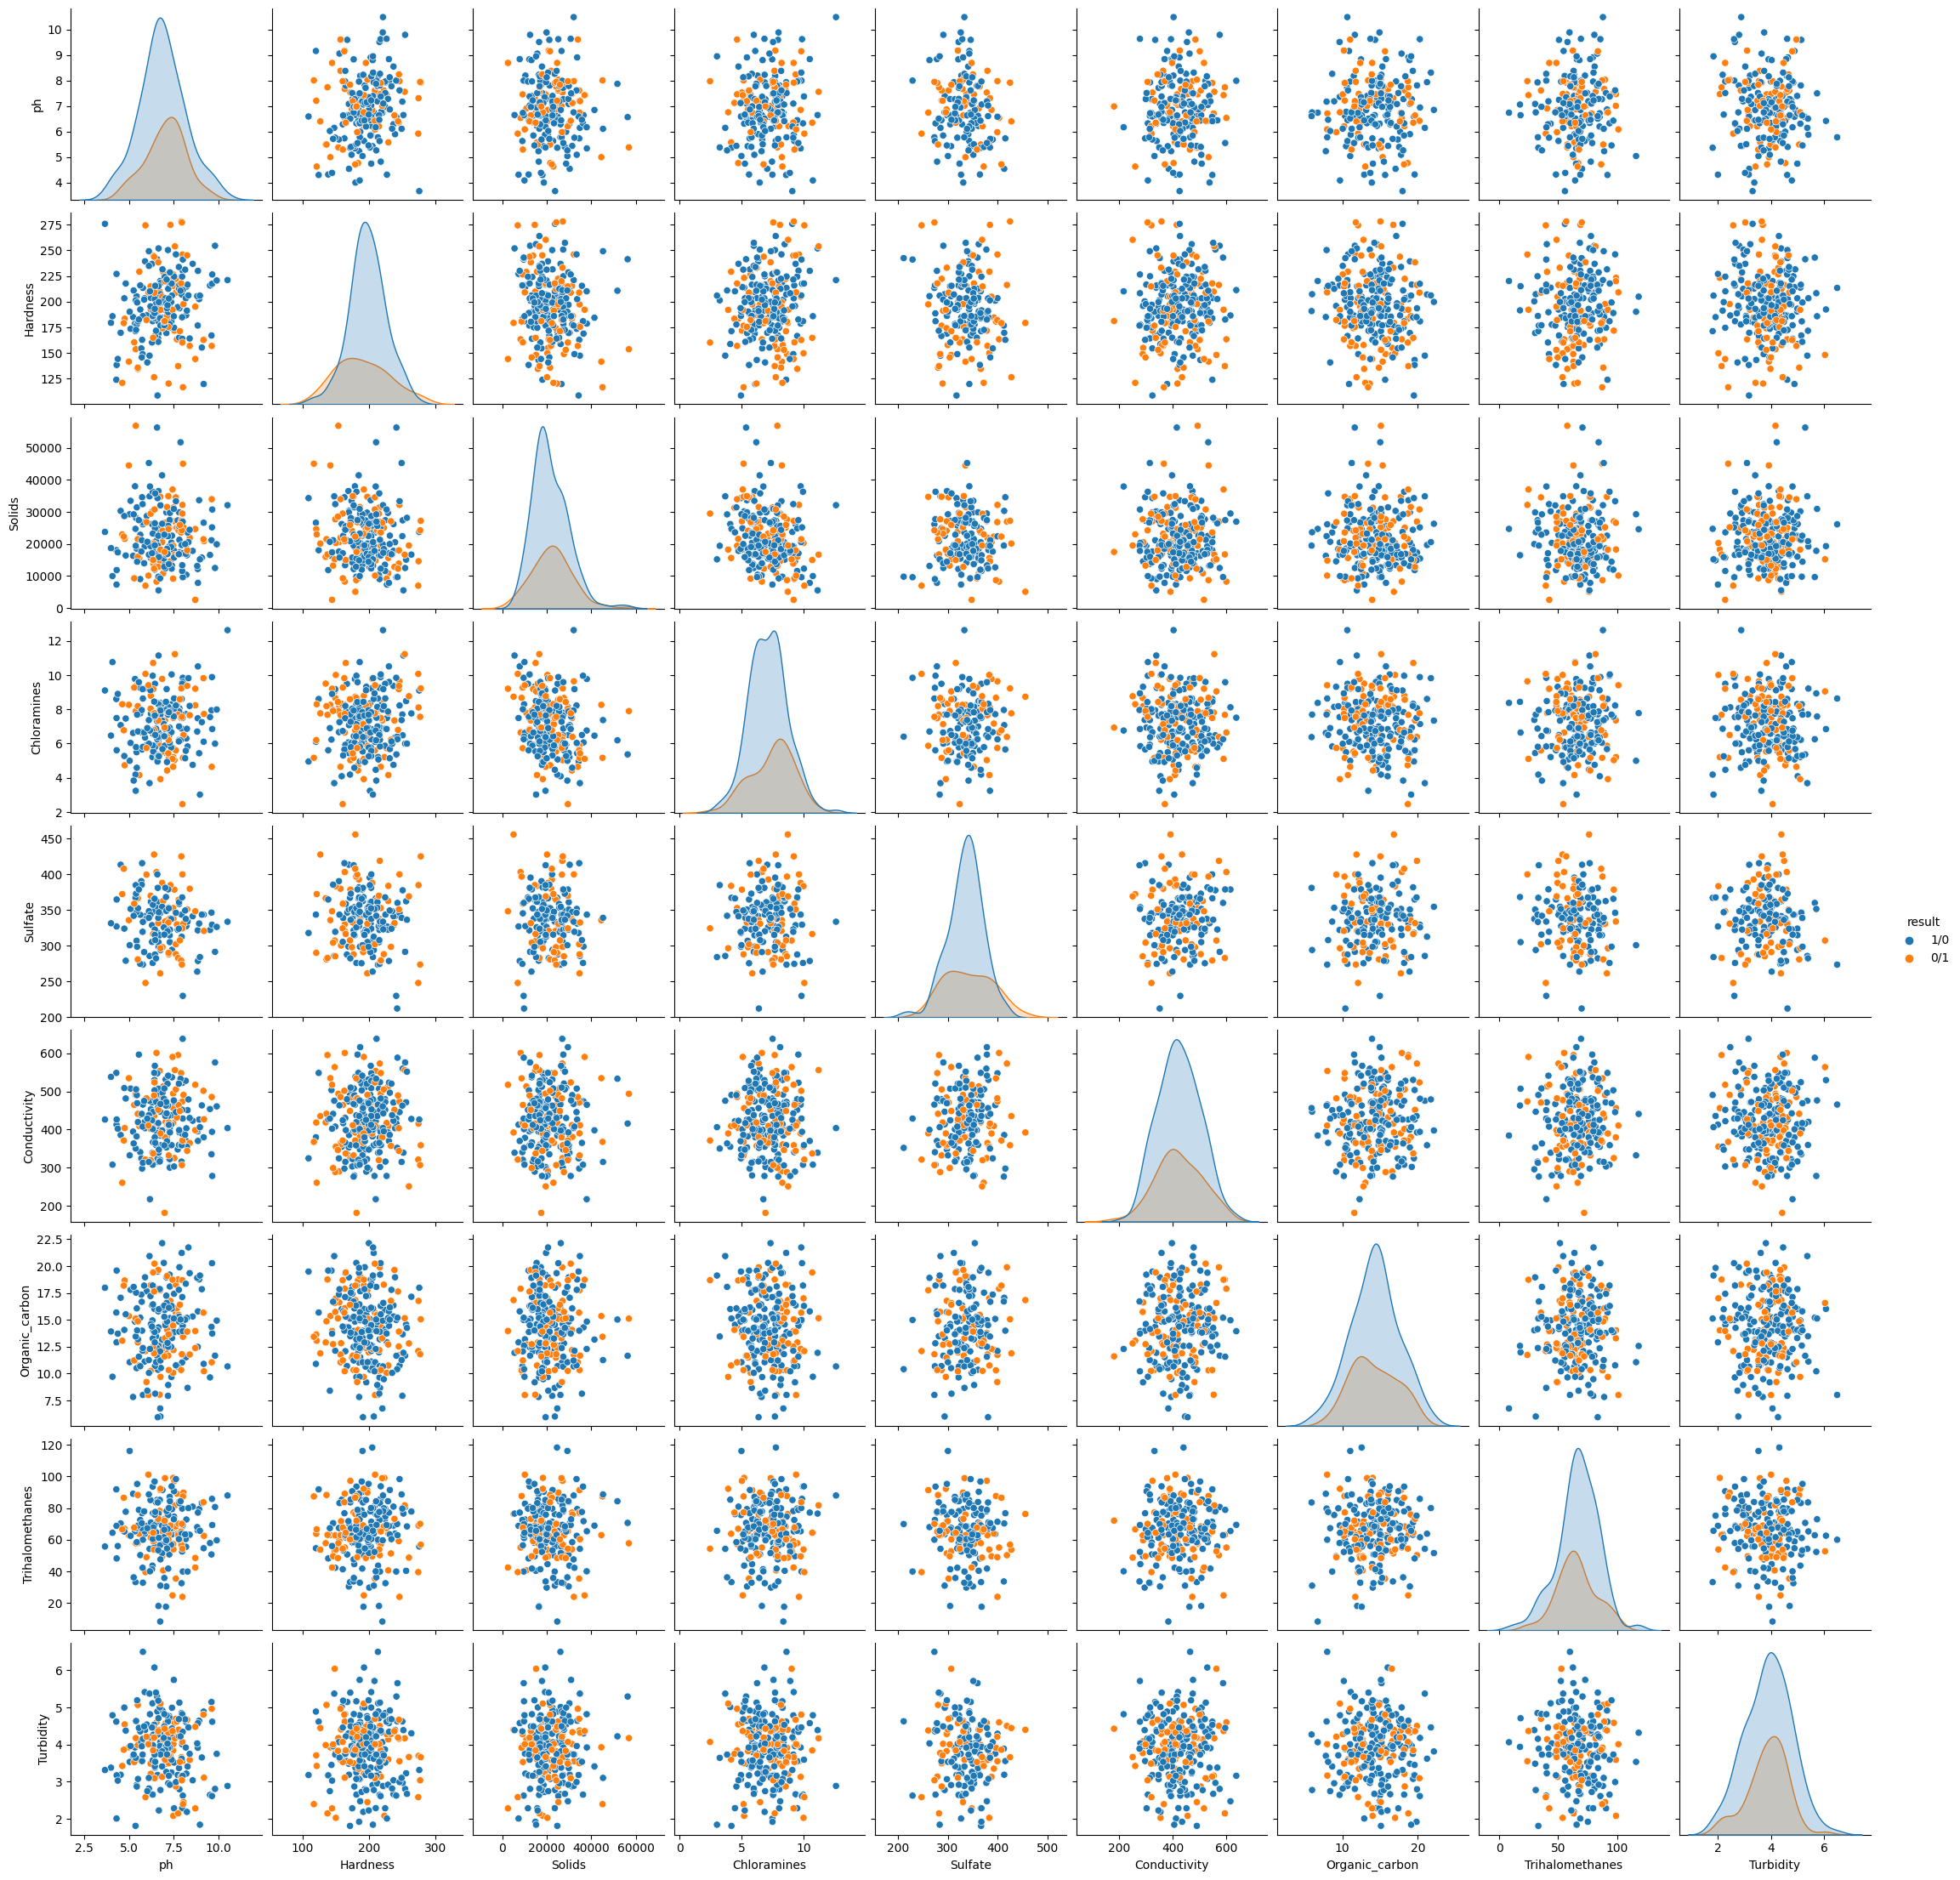

In [11]:
pairplot(data=result_df[result_df['result'].isin({'1/0', '0/1'})].drop(columns=['expected', 'observed']), hue='result')